## **TFG BUNKER RETENCIÓN - ANÁLISIS DEL DATO 🤖**

1️⃣ **Explicación y justificación de los modelos analíticos**

2️⃣ **Interpretación y justificación de las métricas utilizadas para comparar los modelos**

3️⃣ **Visualización de los resultados obtenidos**

4️⃣ **Explicación de resultados obtenidos**

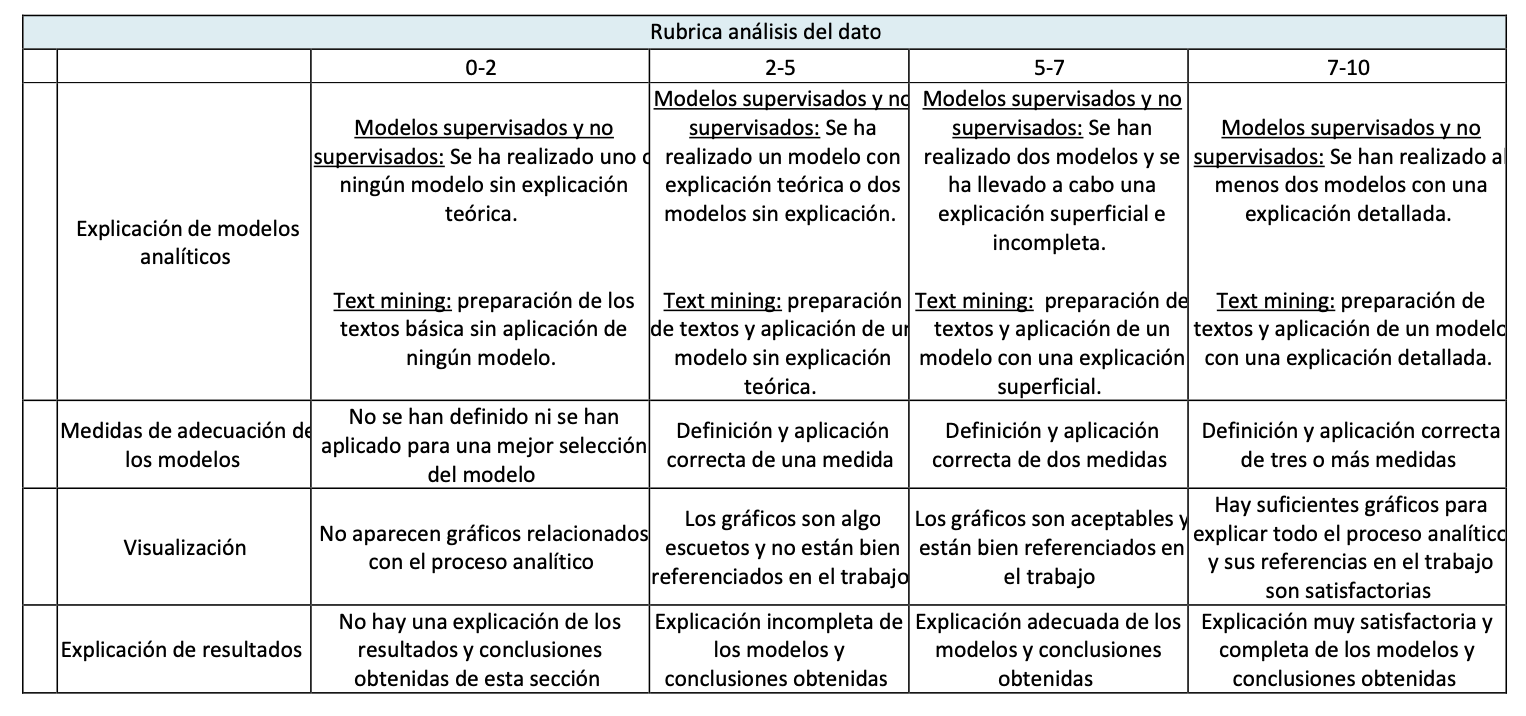

### 💭 **Anuncios:**

**Anuncio 1:**

El contenido de la parte de análisis del dato debe recoger los siguientes aspectos:

• Explicación del problema de análisis que planteáis

• Justificación y detalle de los modelos que utilizáis para resolver el problema planteado

• Interpretación y justificación de las métricas utilizadas para comparar los modelos

• Visualización y discusión de los resultados obtenidos

Recordad que no es lo mismo analizar una base de datos de sección cruzada, una serie temporal, datos de panel, una imagen, un vídeo, un audio, un texto o datos georreferenciados. Cada uno tiene sus particularidades y en función de la naturaleza de dicha estructura, tendréis que aplicar los modelos de una forma u otra. Además, debéis de incluir una descripción de cada uno de los modelos utilizados pero ajustándolo al caso de uso vuestro. No es admisible incluir una descripción teórica “tipo manual" o "apuntes genéricos” que no aportan nada.

Tened en cuenta también que no se trata de incorporar tablas y gráficos sin ton ni son (a modo "check-list"). Lo que incluyáis debe de interpretarse correctamente y debe de aportar valor al trabajo que estáis realizando en vuestro proyecto fin de carrera.

No pongáis capturas de pantalla de código, resultados o páginas, tan solo de los gráficos. Los resultados siempre en formato tabla, ayudan mucho a la visualización.

Revisad la rúbrica, entenderéis la importancia de cada una de las partes indicadas.

### 📚 **Importación de librerías:**

In [ ]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
# from skimpy import skim
import statsmodels.api as sm
import os
from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder ,StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score, precision_score, auc, f1_score, make_scorer, silhouette_score
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from kmodes.kprototypes import KPrototypes
import joblib
## La siguiente librería genera el informe html de pandas-profiling
# from pandas_profiling import ProfileReport
# from skimpy import skim

### 📥 **Importación de datos:**

In [ ]:
# Cargar el archivo CSV en un DataFrame
datos = pd.read_csv(r'C:\Users\rlmart5\OneDrive - MAPFRE\Documentos\MARTA\UNIVERSIDAD\TFG\0. Ficheros datos\datos_limpios.csv')
datos.head()

,producto_comercial,dgt_agrupado,forma_contratacion,tipo_productor,forma_pago,canal_cliente,sectores_contratados,integralidad_cliente,cliente_activo_digital,sectores_estrategicos,tipo_valor_cliente,mes_proceso,tramo_edad,tramo_antiguedad,tramo_numero_polizas,canal_contratacion_agrupado,resultado_retencion
0,AI,CATALUÑA-BALEARES,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,8,31-80,1-30,2,RED,RETENIDO
1,AI,NOROESTE,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,9,31-80,1-30,2,RED,ANULADO
2,AI,NOROESTE,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,6,31-80,31-48,3,RED,RETENIDO
3,AN,SUROESTE,INTERMEDIADO,AGENTES,A,1,AP,C,S,2.0,3,11,31-80,1-30,3,RED,RETENIDO
4,AI,MADRID,INTERMEDIADO,DELEGADOS,A,1,A,D,S,1.0,3,10,31-80,1-30,1,RED,ANULADO


In [ ]:
# Hacemos una copia para el pipeline final
datos_copia = datos.copy()
datos_copia.head()

,producto_comercial,dgt_agrupado,forma_contratacion,tipo_productor,forma_pago,canal_cliente,sectores_contratados,integralidad_cliente,cliente_activo_digital,sectores_estrategicos,tipo_valor_cliente,mes_proceso,tramo_edad,tramo_antiguedad,tramo_numero_polizas,canal_contratacion_agrupado,resultado_retencion
0,AI,CATALUÑA-BALEARES,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,8,31-80,1-30,2,RED,RETENIDO
1,AI,NOROESTE,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,9,31-80,1-30,2,RED,ANULADO
2,AI,NOROESTE,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,6,31-80,31-48,3,RED,RETENIDO
3,AN,SUROESTE,INTERMEDIADO,AGENTES,A,1,AP,C,S,2.0,3,11,31-80,1-30,3,RED,RETENIDO
4,AI,MADRID,INTERMEDIADO,DELEGADOS,A,1,A,D,S,1.0,3,10,31-80,1-30,1,RED,ANULADO


### 🎯 **Variable objetivo:**

In [ ]:
# Contar los valores en la columna "resultado_retencion"
conteo_resultados = datos['resultado_retencion'].value_counts()
print(conteo_resultados)

ANULADO     61665
RETENIDO    46293
Name: resultado_retencion, dtype: int64


### 🔠🔢 **Codificación de variables:**

In [ ]:
VNumericas=list(datos.select_dtypes(include=["float64", "int64"]))     # Se agrupan todas las variables numericas en VNumericas
VCategoricas=list(datos.select_dtypes(exclude=["float64", "int64"]))   # Se agrupan todas las variables categoricas en VCategoricas

print("\nVariables númericas:\n ",VNumericas)
print("\nVariables categóricas:\n ",VCategoricas)


Variables númericas:
  ['canal_cliente', 'sectores_estrategicos', 'tipo_valor_cliente', 'mes_proceso', 'tramo_numero_polizas']

Variables categóricas:
  ['producto_comercial', 'dgt_agrupado', 'forma_contratacion', 'tipo_productor', 'forma_pago', 'sectores_contratados', 'integralidad_cliente', 'cliente_activo_digital', 'tramo_edad', 'tramo_antiguedad', 'canal_contratacion_agrupado', 'resultado_retencion']


#### **Variables numéricas (orden lógico):**

Se quedan como están: 'canal_cliente', 'mes_proceso', 'sectores_estrategicos', 'tramo_numero_polizas'

**Tipo_valor_cliente:**

In [ ]:
# Definir un diccionario para mapear los valores a su orden lógico correcto. Datos actuales -> 1=Platino, 2=Oro, 3=Plata. Hay que cambiarlo.
mapa_tipo_valor_cliente = {1: 3, 2: 2, 3: 1}

# Aplicar el mapeo a la columna 'tipo_valor_cliente'
datos['tipo_valor_cliente'] = datos['tipo_valor_cliente'].map(mapa_tipo_valor_cliente)

#### **Variables categóricas:**

##### **One-Hot Encoding (categóricas nominales):**

Variables categóricas nominales: 'producto_comercial', 'dgt_agrupado', 'forma_contratacion', 'tipo_productor', 'forma_pago', 'cliente_activo_digital', 'tramo_edad', 'tramo_antiguedad', 'canal_contratacion_agrupado'

In [ ]:
# Variables categóricas nominales
nominales = ['producto_comercial','dgt_agrupado', 'forma_contratacion', 'tipo_productor', 'forma_pago', 'cliente_activo_digital', 'canal_contratacion_agrupado','tramo_edad', 'tramo_antiguedad',]

# Aplicar One-Hot Encoding a las variables nominales
datos = pd.get_dummies(datos, columns=nominales)

print('One-Hot Encoding aplicado con éxito.')

One-Hot Encoding aplicado con éxito.


##### **Ordinal Encoder (categóricas ordinales):**

Variables categóricas ordinales: 'sectores_contratados', 'integralidad_cliente', 'resultado_retencion'

In [ ]:
# Definir el orden lógico  (Anulado es 0 y retenido es 1)
orden_logico_resultado = ['ANULADO', 'RETENIDO']
orden_logico_integralidad = ['D', 'C', 'B', 'A']

# Crear un OrdinalEncoder con el orden lógico
orden_logico_resultado = OrdinalEncoder(categories=[orden_logico_resultado])
ordinal_encoder_integralidad = OrdinalEncoder(categories=[orden_logico_integralidad])

# Aplicar Ordinal Encoding
datos['resultado_retencion'] = orden_logico_resultado.fit_transform(datos[['resultado_retencion']])
datos['integralidad_cliente'] = ordinal_encoder_integralidad.fit_transform(datos[['integralidad_cliente']])

In [ ]:
# Definir una función para codificar la longitud de la cadena
def codificar_longitud(cadena):
    return len(cadena)

# Aplicar la codificación basada en la longitud de la cadena a la variable 'sectores_contratados'
datos['sectores_contratados_codificado'] = datos['sectores_contratados'].apply(codificar_longitud)

In [ ]:
# Eliminar la columna original 'sectores_contratados'
datos = datos.drop(columns=['sectores_contratados'])

#### **Datos tras codificar:**

In [ ]:
datos.head()

,canal_cliente,integralidad_cliente,sectores_estrategicos,tipo_valor_cliente,mes_proceso,tramo_numero_polizas,resultado_retencion,producto_comercial_AB,producto_comercial_AI,producto_comercial_AN,...,canal_contratacion_agrupado_OTROS CANALES,canal_contratacion_agrupado_RED,tramo_edad_18-30,tramo_edad_31-80,tramo_edad_>80,tramo_antiguedad_1-30,tramo_antiguedad_31-48,tramo_antiguedad_<1,tramo_antiguedad_>49,sectores_contratados_codificado
0,1,1.0,2.0,1,8,2,1.0,0,1,0,...,0,1,0,1,0,1,0,0,0,2
1,1,1.0,2.0,1,9,2,0.0,0,1,0,...,0,1,0,1,0,1,0,0,0,2
2,1,1.0,2.0,1,6,3,1.0,0,1,0,...,0,1,0,1,0,0,1,0,0,2
3,1,1.0,2.0,1,11,3,1.0,0,0,1,...,0,1,0,1,0,1,0,0,0,2
4,1,0.0,1.0,1,10,1,0.0,0,1,0,...,0,1,0,1,0,1,0,0,0,1


### ➗ **División de los datos:**

In [ ]:
# "datos" es el DataFrame y "resultado_retencion" es la variable objetivo
X = datos.drop(columns=['resultado_retencion'])
y = datos['resultado_retencion']

### 👩🏽‍⚖️ **Balanceo de los datos:**

In [ ]:
# Balanceo de datos usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Contar los valores en la columna "resultado_retencion" después de aplicar SMOTE
conteo_resultados_resampled = pd.Series(y_resampled).value_counts()
print(conteo_resultados_resampled)

1.0    61665
0.0    61665
Name: resultado_retencion, dtype: int64


### 🏋🏽‍♂️**División de datos en train y test:**

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Datos divididos en conjuntos de entrenamiento y prueba.")

Datos divididos en conjuntos de entrenamiento y prueba.


### 😶 **Normalización de los datos:**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

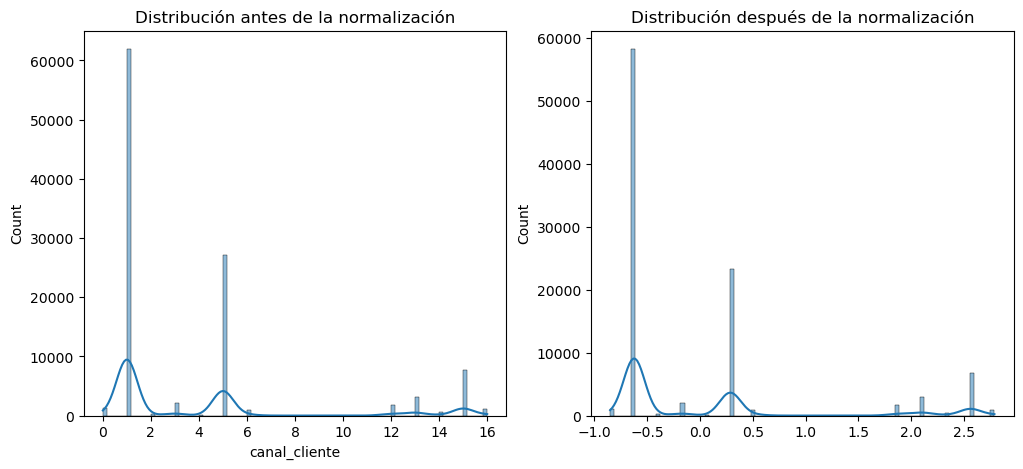

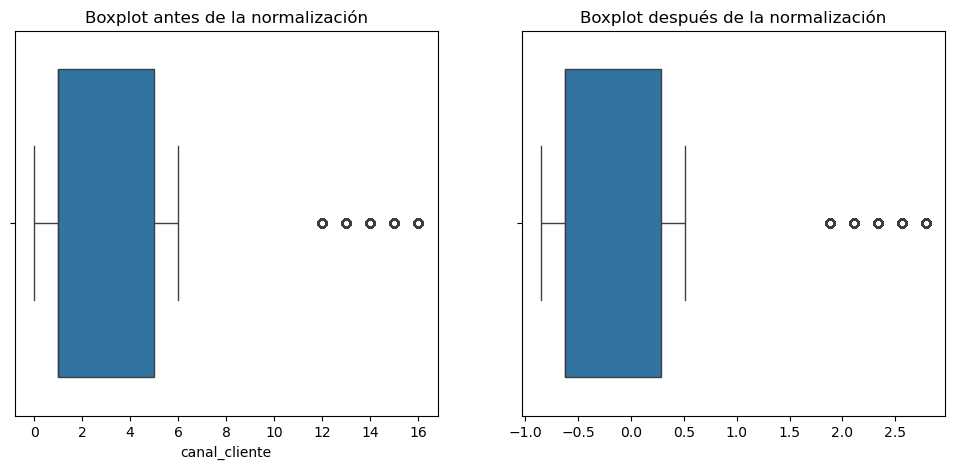

In [ ]:
# Visualizar los datos antes de la normalización
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histograma de una característica antes de la normalización
sns.histplot(X.iloc[:, 0], ax=axes[0], kde=True)
axes[0].set_title('Distribución antes de la normalización')

# Histograma de la misma característica después de la normalización
sns.histplot(X_train_scaled[:, 0], ax=axes[1], kde=True)
axes[1].set_title('Distribución después de la normalización')

plt.show()

# Visualizar los datos después de la normalización con gráficos de caja
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Gráfico de caja de una característica antes de la normalización
sns.boxplot(x=X.iloc[:, 0], ax=axes[0])
axes[0].set_title('Boxplot antes de la normalización')

# Gráfico de caja de la misma característica después de la normalización
sns.boxplot(x=X_train_scaled[:, 0], ax=axes[1])
axes[1].set_title('Boxplot después de la normalización')

plt.show()

### 🤖 **Modelos:**

Como vamos a probar distintos algoritmos, almacenemos los resultados en 'final_results' para luego poder crear dataframe y comparar los distintos resultados.

In [ ]:
final_results = []

#### 📗 **Modelo Regresión Logística:**

##### **Entrenar el modelo y ajustar umbral en TRAIN**

Umbral óptimo: 0.51


<function matplotlib.pyplot.show(close=None, block=None)>

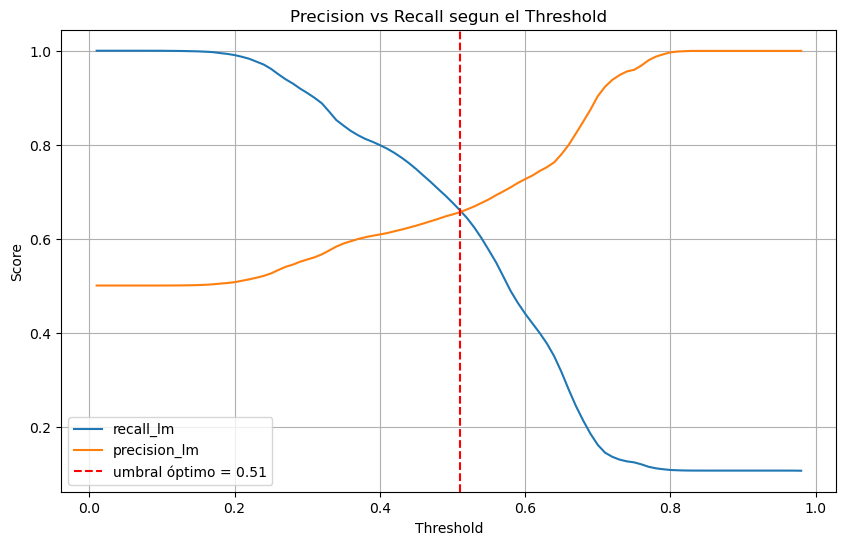

In [ ]:
# Entrenar el modelo de regresión logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
prob_train_lm = logistic_model.predict_proba(X_train_scaled)[:, 1]

# Buscar umbral óptimo
resultados_umbral_lm = []
for threshold in np.arange(0.01,0.99,0.01):
    preds_lm = [1 if p > threshold else 0 for p in prob_train_lm]
    recall_lm = recall_score(y_train, preds_lm)
    precision_lm = precision_score(y_train, preds_lm)
    resultados_umbral_lm.append([threshold,recall_lm,precision_lm])

# Convertir a DataFrame
df_umbral_lm = pd.DataFrame(resultados_umbral_lm,columns=['threshold','recall_lm','precision_lm'])

# Umbral donde recall y precision se cruzan
idx = np.argmin(abs(df_umbral_lm['recall_lm']-df_umbral_lm['precision_lm']))
chosen_threshold = df_umbral_lm.loc[idx, 'threshold']
print(f"Umbral óptimo: {chosen_threshold:.2f}")

# Visualizar precisión y recall según el umbral
plt.figure(figsize=(10,6))
plt.plot(df_umbral_lm['threshold'], df_umbral_lm['recall_lm'], label='recall_lm')
plt.plot(df_umbral_lm['threshold'], df_umbral_lm['precision_lm'], label='precision_lm')
plt.axvline(x=chosen_threshold,color='red',linestyle='--',label=f'umbral óptimo = {chosen_threshold:.2f}')
plt.title('Precision vs Recall segun el Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show

##### **Evaluar en TRAIN**

TRAIN
Recall: 0.6611
Precision: 0.6566
AUC: 0.6571


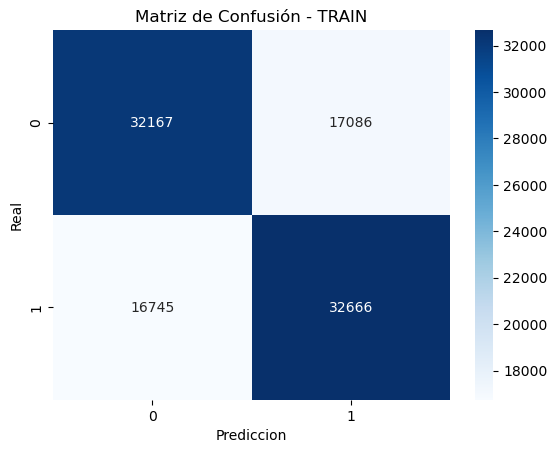

<function matplotlib.pyplot.show(close=None, block=None)>

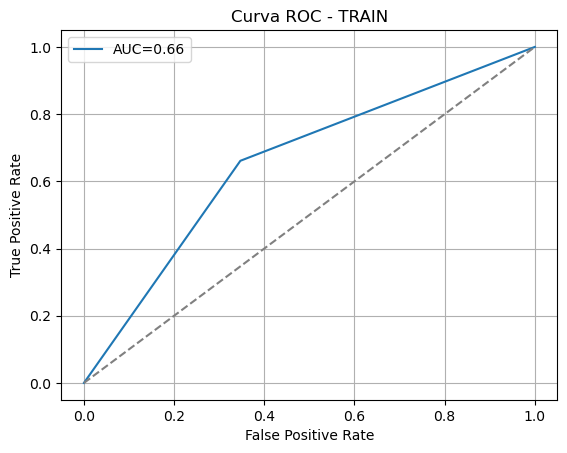

In [ ]:
preds_train_lm = [1 if p > chosen_threshold else 0 for p in prob_train_lm]
recall_train_lm = recall_score(y_train, preds_train_lm)
precision_train_lm = precision_score(y_train, preds_train_lm)
auc_train_lm = roc_auc_score(y_train,preds_train_lm)

print('TRAIN')
print(f'Recall: {recall_train_lm:.4f}')
print(f'Precision: {precision_train_lm:.4f}')
print(f'AUC: {auc_train_lm:.4f}')

# Matriz de confusión
cm_train_lm = confusion_matrix(y_train, preds_train_lm)
sns.heatmap(cm_train_lm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TRAIN')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_train, tpr_train, _ = roc_curve(y_train, preds_train_lm)

plt.figure()
plt.plot(fpr_train, tpr_train, label = f'AUC={auc_train_lm:.2f}')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.title('Curva ROC - TRAIN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show

##### **Evaluar en TEST**

TRAIN
Recall: 0.6603
Precision: 0.6565
AUC: 0.6596


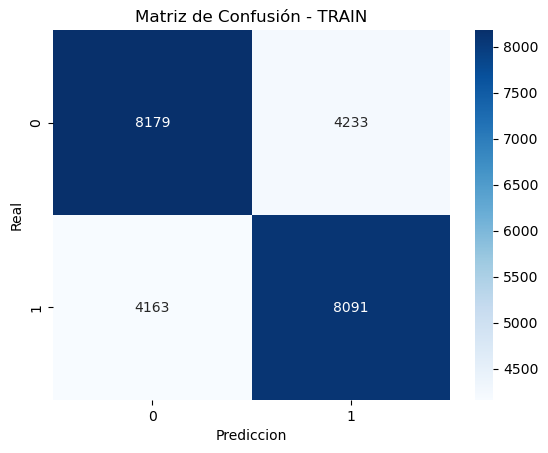

<function matplotlib.pyplot.show(close=None, block=None)>

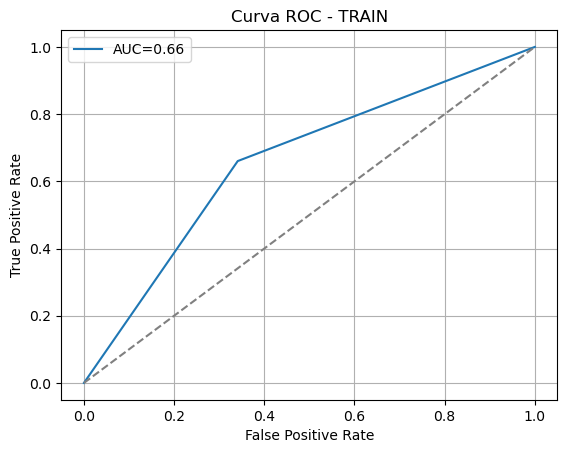

In [ ]:
prob_test_lm = logistic_model.predict_proba(X_test_scaled)[:,1]
preds_test_lm = [1 if p > chosen_threshold else 0 for p in prob_test_lm]
recall_test_lm = recall_score(y_test, preds_test_lm)
precision_test_lm = precision_score(y_test, preds_test_lm)
auc_test_lm = roc_auc_score(y_test,preds_test_lm)

print('TEST')
print(f'Recall: {recall_test_lm:.4f}')
print(f'Precision: {precision_test_lm:.4f}')
print(f'AUC: {auc_test_lm:.4f}')

# Matriz de confusión
cm_test_lm = confusion_matrix(y_test, preds_test_lm)
sns.heatmap(cm_test_lm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TEST')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_test, tpr_test, _ = roc_curve(y_test, preds_test_lm)

plt.figure()
plt.plot(fpr_test, tpr_test, label = f'AUC={auc_test_lm:.2f}')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.title('Curva ROC - TEST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show

##### **Resultados**

In [ ]:
resultados_lm = {'Modelo': 'Regresion Logistica',
                 'Recall_Train': recall_train_lm,
                 'Precision_Train': precision_train_lm,
                 'AUC_Train': auc_train_lm,
                 'Recall_Test': recall_test_lm,
                 'Precision_Test': precision_test_lm,
                 'AUC_Test': auc_test_lm
                 }
final_results.append(resultados_lm)

##### **Importancia de variables**

In [ ]:
coef_log = logistic_model.coef_[0]
columnas_originales= X_train.columns

In [ ]:
ranking_log = pd.DataFrame({
    'Variable':list(columnas_originales),
    'Coeficiente': coef_log,
    'Importancia':np.abs(coef_log)
    })

In [ ]:
# Si el coeficiente es negativo afecta para que anulen y si es positivo afecta para que sean retenidos.
ranking_log= ranking_log.sort_values(by="Importancia", ascending=False)
ranking_log

,Variable,Coeficiente,Importancia
17,dgt_agrupado_MADRID,-2.679343,2.679343
26,tipo_productor_ACUERDOS DISTRIBUCION-RCI,-2.658324,2.658324
8,producto_comercial_AN,-2.540410,2.540410
7,producto_comercial_AI,-2.491910,2.491910
43,tipo_productor_DELEGADOS,-2.227330,2.227330
...,...,...,...
27,tipo_productor_ACUERDOS-AON,-0.026227,0.026227
47,tipo_productor_GRANDES BROKERS,-0.021616,0.021616
54,tipo_productor_PRODUCCION RACE,-0.020936,0.020936
49,tipo_productor_OTRAS AGRUPACIONES-ADM.FINCAS,-0.020478,0.020478


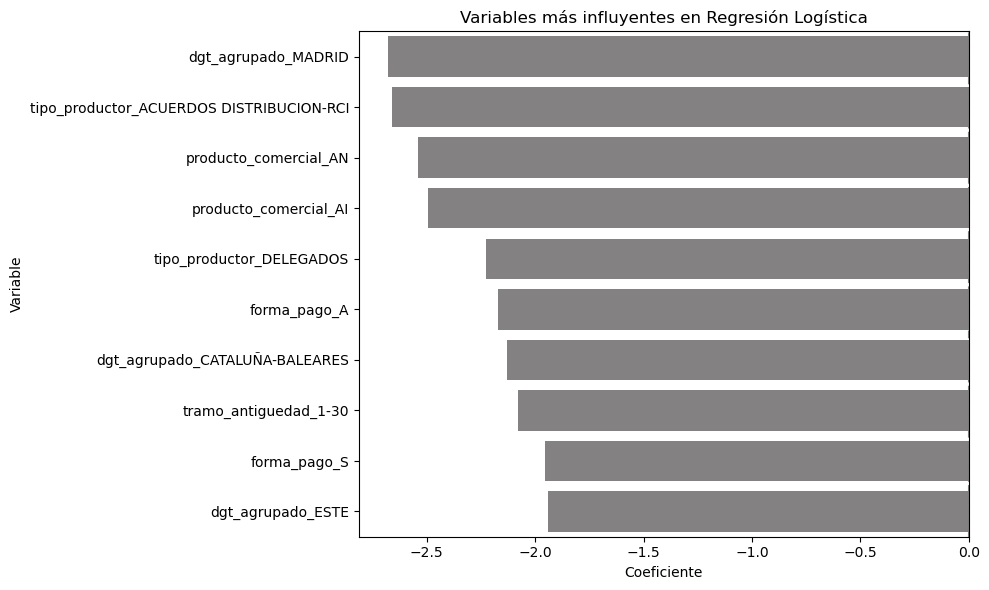

In [ ]:
# Seleccionar las 10 variables más importantes
top_vars = ranking_log.sort_values(by='Importancia',ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coeficiente',
    y='Variable',
    data=top_vars,
    color="#838181"
)

plt.axvline(0, color='gray', linestyle='--')
plt.title('Variables más influyentes en Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

#### 📕 **Modelo Random Forest:**

##### **Entrenar el modelo y ajustar umbral en TRAIN**

Umbral óptimo: 0.50


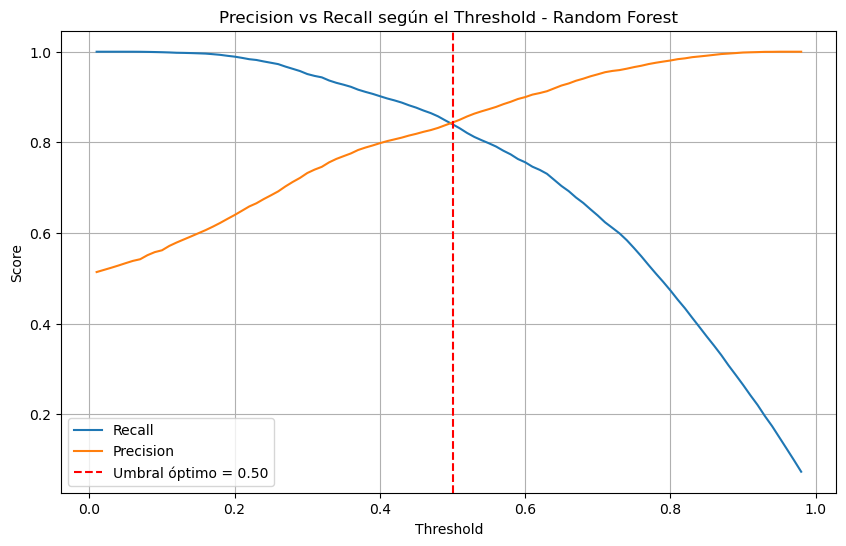

In [ ]:
# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Hacer predicciones probabilísticas en el conjunto de entrenamiento
prob_train_rf = rf_model.predict_proba(X_train_scaled)[:, 1]

# Buscar umbral óptimo
resultados_umbral_rf = []
for threshold in np.arange(0.01, 0.99, 0.01):
    preds_rf = [1 if p > threshold else 0 for p in prob_train_rf]
    recall_rf = recall_score(y_train, preds_rf)
    precision_rf = precision_score(y_train, preds_rf)
    resultados_umbral_rf.append([threshold, recall_rf, precision_rf])

# Convertir a DataFrame
df_umbral_rf = pd.DataFrame(resultados_umbral_rf, columns=['threshold', 'recall_rf', 'precision_rf'])

# Umbral donde recall y precision se cruzan
idx = np.argmin(abs(df_umbral_rf['recall_rf'] - df_umbral_rf['precision_rf']))
chosen_threshold = df_umbral_rf.loc[idx, 'threshold']
print(f"Umbral óptimo: {chosen_threshold:.2f}")

# Visualizar precisión y recall según el umbral
plt.figure(figsize=(10, 6))
plt.plot(df_umbral_rf['threshold'], df_umbral_rf['recall_rf'], label='Recall')
plt.plot(df_umbral_rf['threshold'], df_umbral_rf['precision_rf'], label='Precision')
plt.axvline(x=chosen_threshold, color='red', linestyle='--', label=f'Umbral óptimo = {chosen_threshold:.2f}')
plt.title('Precision vs Recall según el Threshold - Random Forest')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

##### **Evaluar en TRAIN**

TRAIN
Recall: 0.8400
Precision: 0.8438
AUC: 0.8420


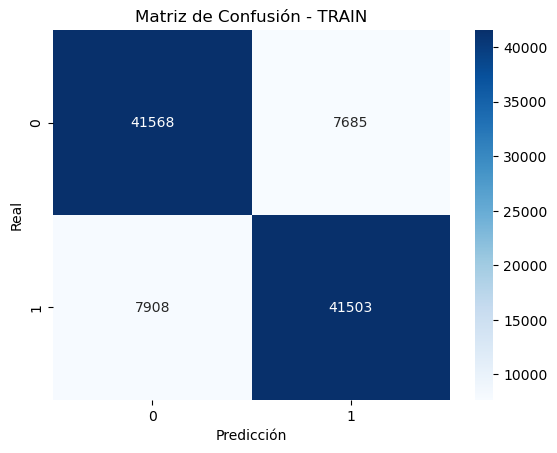

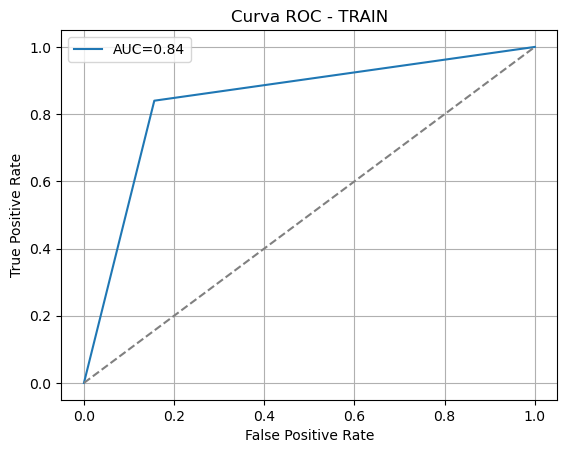

In [ ]:
# Hacer predicciones en el conjunto de entrenamiento con el umbral óptimo
preds_train_rf = [1 if p > chosen_threshold else 0 for p in prob_train_rf]
recall_train_rf = recall_score(y_train, preds_train_rf)
precision_train_rf = precision_score(y_train, preds_train_rf)
auc_train_rf = roc_auc_score(y_train, preds_train_rf)

print('TRAIN')
print(f'Recall: {recall_train_rf:.4f}')
print(f'Precision: {precision_train_rf:.4f}')
print(f'AUC: {auc_train_rf:.4f}')

# Matriz de confusión
cm_train_rf = confusion_matrix(y_train, preds_train_rf)
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TRAIN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_train, tpr_train, _ = roc_curve(y_train, preds_train_rf)

plt.figure()
plt.plot(fpr_train, tpr_train, label=f'AUC={auc_train_rf:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - TRAIN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

##### **Evaluar en TEST**

TEST
Recall: 0.6411
Precision: 0.6358
AUC: 0.6392


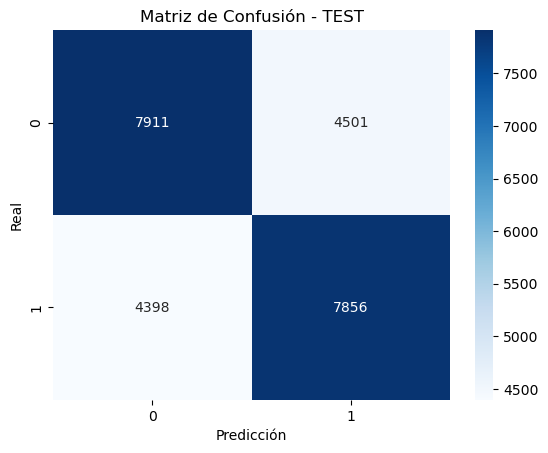

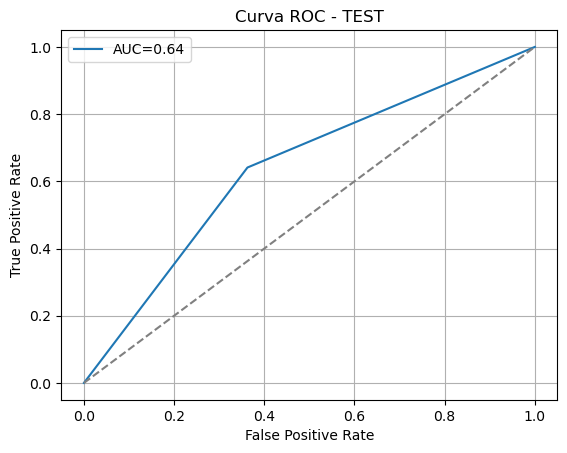

In [ ]:
# Hacer predicciones probabilísticas en el conjunto de prueba
prob_test_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
preds_test_rf = [1 if p > chosen_threshold else 0 for p in prob_test_rf]

# Calcular métricas en el conjunto de prueba
recall_test_rf = recall_score(y_test, preds_test_rf)
precision_test_rf = precision_score(y_test, preds_test_rf)
auc_test_rf = roc_auc_score(y_test, preds_test_rf)

print('TEST')
print(f'Recall: {recall_test_rf:.4f}')
print(f'Precision: {precision_test_rf:.4f}')
print(f'AUC: {auc_test_rf:.4f}')

# Matriz de confusión
cm_test_rf = confusion_matrix(y_test, preds_test_rf)
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TEST')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_test, tpr_test, _ = roc_curve(y_test, preds_test_rf)

plt.figure()
plt.plot(fpr_test, tpr_test, label=f'AUC={auc_test_rf:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - TEST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

##### **Resultados**

In [ ]:
resultados_rf = {
    'Modelo': 'Random Forest',
    'Recall_Train': recall_train_rf,
    'Precision_Train': precision_train_rf,
    'AUC_Train': auc_train_rf,
    'Recall_Test': recall_test_rf,
    'Precision_Test': precision_test_rf,
    'AUC_Test': auc_test_rf
}
final_results.append(resultados_rf)

##### **Importancia de variables**

In [ ]:
ranking_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

ranking_rf

,Variable,Importancia
4,mes_proceso,0.312580
5,tramo_numero_polizas,0.079685
0,canal_cliente,0.048619
65,canal_contratacion_agrupado_AUTOMOCION,0.036086
3,tipo_valor_cliente,0.033239
...,...,...
27,tipo_productor_ACUERDOS-AON,0.000027
47,tipo_productor_GRANDES BROKERS,0.000021
49,tipo_productor_OTRAS AGRUPACIONES-ADM.FINCAS,0.000016
54,tipo_productor_PRODUCCION RACE,0.000011


#### 📘 **Modelo Gradient Boosting:**

##### **Entrenar el modelo y ajustar el umbral en TRAIN**

Umbral óptimo: 0.53


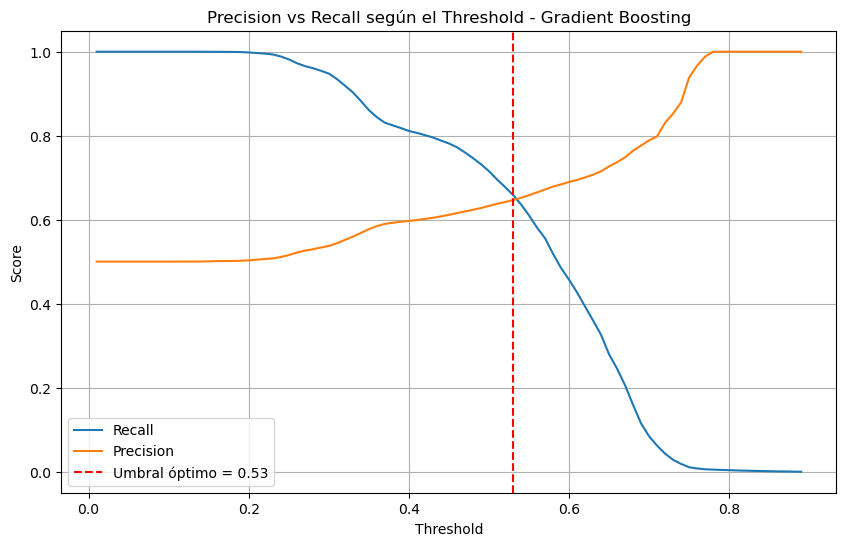

In [ ]:
# Entrenar el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Hacer predicciones probabilísticas en el conjunto de entrenamiento
prob_train_gb = gb_model.predict_proba(X_train_scaled)[:, 1]

# Buscar umbral óptimo
resultados_umbral_gb = []
for threshold in np.arange(0.01, 0.90, 0.01):
    preds_gb = [1 if p > threshold else 0 for p in prob_train_gb]
    recall_gb = recall_score(y_train, preds_gb)
    precision_gb = precision_score(y_train, preds_gb)
    resultados_umbral_gb.append([threshold, recall_gb, precision_gb])

# Convertir a DataFrame
df_umbral_gb = pd.DataFrame(resultados_umbral_gb, columns=['threshold', 'recall_gb', 'precision_gb'])

# Umbral donde recall y precision se cruzan
idx = np.argmin(abs(df_umbral_gb['recall_gb'] - df_umbral_gb['precision_gb']))
chosen_threshold = df_umbral_gb.loc[idx, 'threshold']
print(f"Umbral óptimo: {chosen_threshold:.2f}")

# Visualizar precisión y recall según el umbral
plt.figure(figsize=(10, 6))
plt.plot(df_umbral_gb['threshold'], df_umbral_gb['recall_gb'], label='Recall')
plt.plot(df_umbral_gb['threshold'], df_umbral_gb['precision_gb'], label='Precision')
plt.axvline(x=chosen_threshold, color='red', linestyle='--', label=f'Umbral óptimo = {chosen_threshold:.2f}')
plt.title('Precision vs Recall según el Threshold - Gradient Boosting')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

##### **Evaluar en TRAIN**

TRAIN
Recall: 0.6596
Precision: 0.6471
AUC: 0.6494


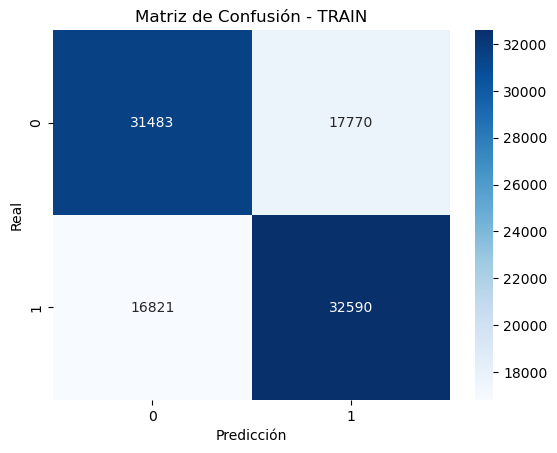

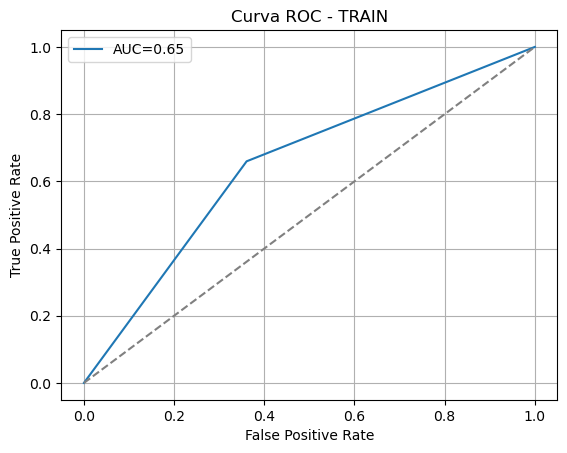

In [ ]:
# Hacer predicciones en el conjunto de entrenamiento con el umbral óptimo
preds_train_gb = [1 if p > chosen_threshold else 0 for p in prob_train_gb]
recall_train_gb = recall_score(y_train, preds_train_gb)
precision_train_gb = precision_score(y_train, preds_train_gb)
auc_train_gb = roc_auc_score(y_train, preds_train_gb)

print('TRAIN')
print(f'Recall: {recall_train_gb:.4f}')
print(f'Precision: {precision_train_gb:.4f}')
print(f'AUC: {auc_train_gb:.4f}')

# Matriz de confusión
cm_train_gb = confusion_matrix(y_train, preds_train_gb)
sns.heatmap(cm_train_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TRAIN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_train, tpr_train, _ = roc_curve(y_train, preds_train_gb)

plt.figure()
plt.plot(fpr_train, tpr_train, label=f'AUC={auc_train_gb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - TRAIN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

##### **Evaluar en TEST**

TEST
Recall: 0.6551
Precision: 0.6434
AUC: 0.6483


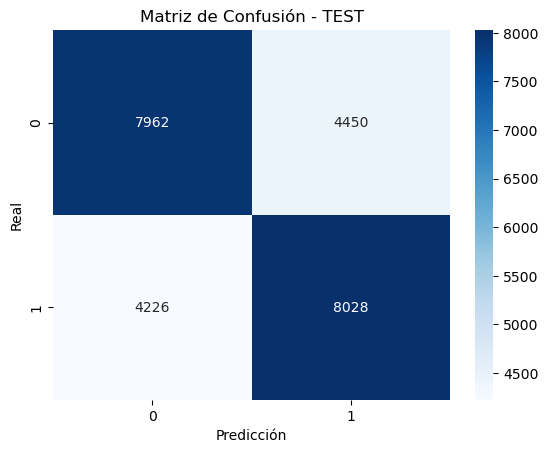

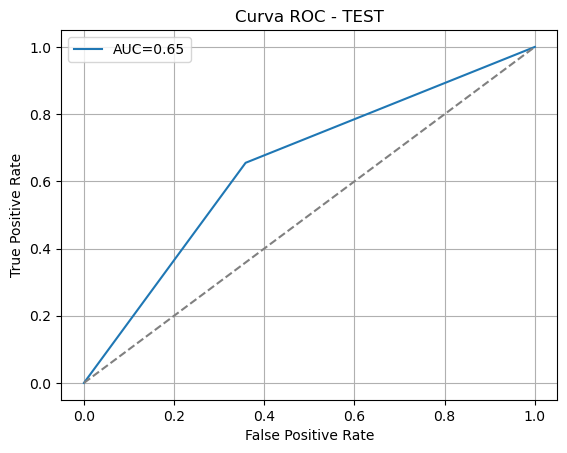

In [ ]:
# Hacer predicciones probabilísticas en el conjunto de prueba
prob_test_gb = gb_model.predict_proba(X_test_scaled)[:, 1]
preds_test_gb = [1 if p > chosen_threshold else 0 for p in prob_test_gb]

# Calcular métricas en el conjunto de prueba
recall_test_gb = recall_score(y_test, preds_test_gb)
precision_test_gb = precision_score(y_test, preds_test_gb)
auc_test_gb = roc_auc_score(y_test, preds_test_gb)

print('TEST')
print(f'Recall: {recall_test_gb:.4f}')
print(f'Precision: {precision_test_gb:.4f}')
print(f'AUC: {auc_test_gb:.4f}')

# Matriz de confusión
cm_test_gb = confusion_matrix(y_test, preds_test_gb)
sns.heatmap(cm_test_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TEST')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_test, tpr_test, _ = roc_curve(y_test, preds_test_gb)

plt.figure()
plt.plot(fpr_test, tpr_test, label=f'AUC={auc_test_gb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - TEST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

##### **Resultados**

In [ ]:
resultados_gb = {
    'Modelo': 'Gradient Boosting',
    'Recall_Train': recall_train_gb,
    'Precision_Train': precision_train_gb,
    'AUC_Train': auc_train_gb,
    'Recall_Test': recall_test_gb,
    'Precision_Test': precision_test_gb,
    'AUC_Test': auc_test_gb
}

final_results.append(resultados_gb)

##### **Importancia de variables**

In [ ]:
ranking_gb = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': gb_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

ranking_gb

,Variable,Importancia
65,canal_contratacion_agrupado_AUTOMOCION,0.586879
7,producto_comercial_AI,0.084433
2,sectores_estrategicos,0.030777
74,tramo_antiguedad_<1,0.024716
4,mes_proceso,0.020962
...,...,...
40,tipo_productor_BMN-NUEVA PRODUCCION 2019,0.000000
32,tipo_productor_AGREGADORES,0.000000
36,tipo_productor_AUTOMOCION-OBS,0.000000
35,tipo_productor_AUTOMOCION-MERCEDES,0.000000


#### **💡Resultados previos ajustes de hiperparámetros:**

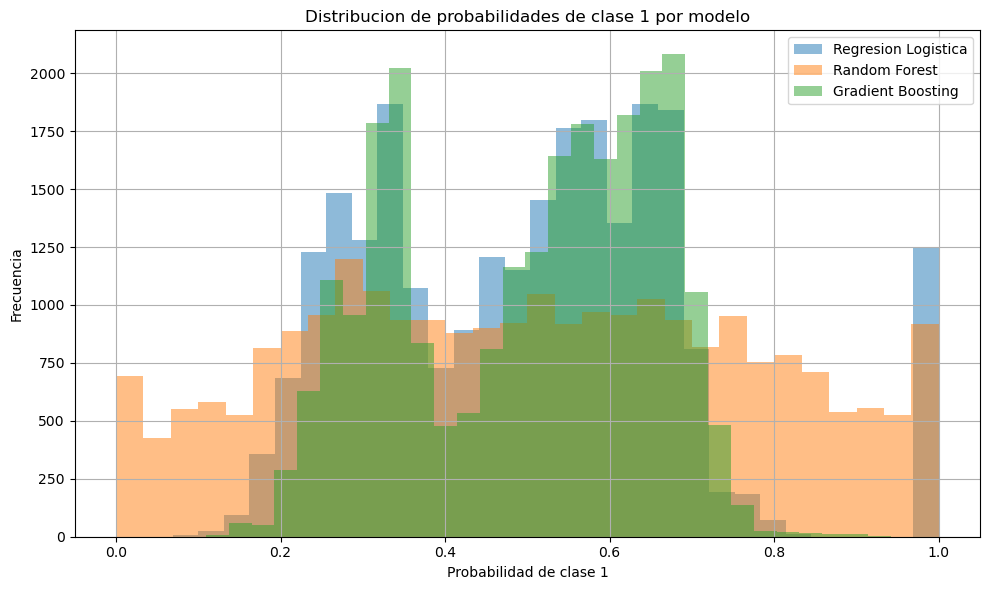

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(prob_test_lm, bins=30,alpha=0.5, label='Regresion Logistica')
plt.hist(prob_test_rf, bins=30,alpha=0.5, label='Random Forest')
plt.hist(prob_test_gb, bins=30,alpha=0.5, label='Gradient Boosting')

plt.title('Distribucion de probabilidades de clase 1 por modelo')
plt.xlabel('Probabilidad de clase 1')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame(final_results)
results_df

,Modelo,Recall_Train,Precision_Train,AUC_Train,Recall_Test,Precision_Test,AUC_Test
0,Regresion Logistica,0.661108,0.656577,0.657103,0.660274,0.656524,0.659617
1,Random Forest,0.839955,0.843763,0.841962,0.641097,0.635753,0.639232
2,Gradient Boosting,0.659570,0.647141,0.649390,0.655133,0.643372,0.648305


In [ ]:
# Transformar el DataFrame de formato ancho a formato largo
results_long_df = results_df.melt(id_vars='Modelo', var_name='Metric', value_name='Score')
results_long_df.head()

,Modelo,Metric,Score
0,Regresion Logistica,Recall_Train,0.661108
1,Random Forest,Recall_Train,0.839955
2,Gradient Boosting,Recall_Train,0.659570
3,Regresion Logistica,Precision_Train,0.656577
4,Random Forest,Precision_Train,0.843763


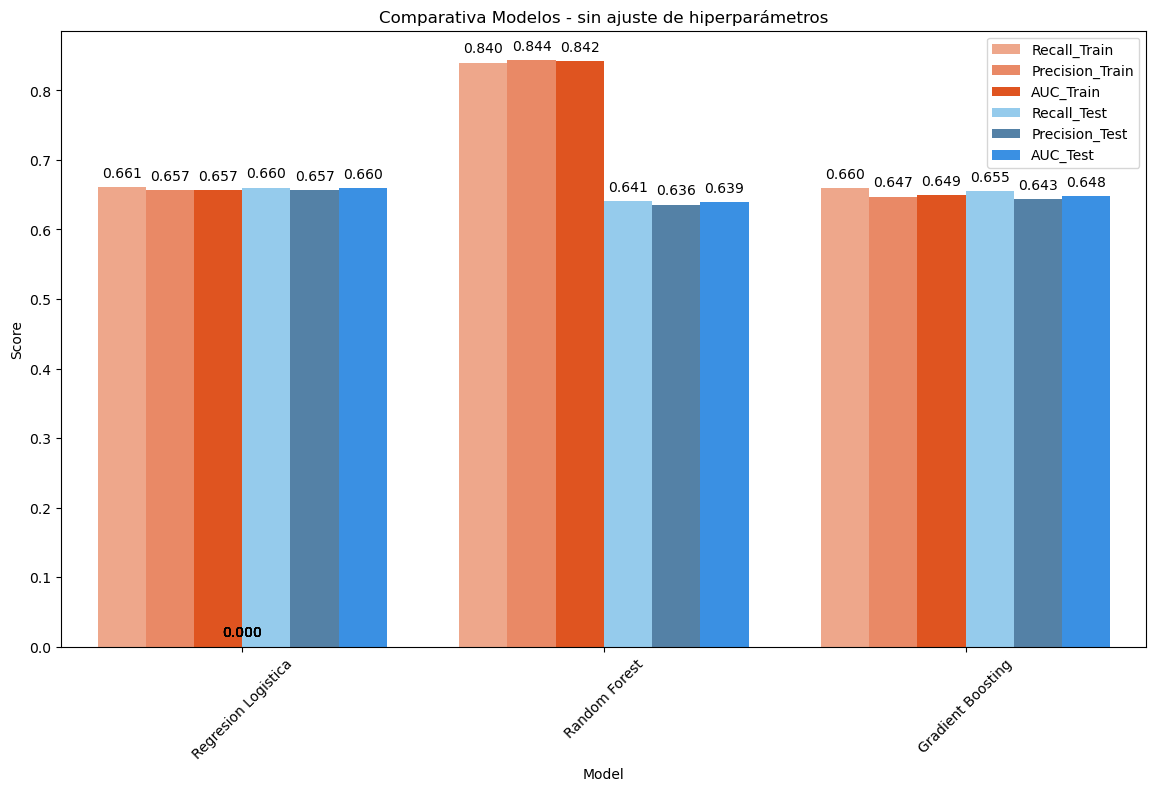

In [ ]:
# Definir una paleta de colores personalizada
palette = {
    'Recall_Train': '#FFA07A',  # Light Salmon
    'Precision_Train': '#FF7F50',  # Coral
    'AUC_Train': '#FF4500',  # Orange Red
    'Recall_Test': '#87CEFA',  # Light Sky Blue
    'Precision_Test': '#4682B4',  # Steel Blue
    'AUC_Test': '#1E90FF'  # Dodger Blue
}

# Crear el gráfico de barras usando seaborn
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Modelo', y='Score', hue='Metric', data=results_long_df, palette=palette)
plt.title('Comparativa Modelos - sin ajuste de hiperparámetros')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Añadir los valores de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

### 📐 **Ajuste de hiperparámetros (tuned):**

#### **📗 Modelo Regresión Logística**

##### **GridSearch**

In [ ]:
# ParamGrid para Regresión Logística
param_log = {
    'C': [0.001,0.01,0.1,0.5,1,10,100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
}

# Ajustar el modelo
grid_lr = GridSearchCV(LogisticRegression(), param_log, cv=3, scoring='roc_auc')
grid_lr.fit(X_train_scaled, y_train)

# Guardar el mejor modelo
best_lr = grid_lr.best_estimator_
print('Mejores hiperparámetros:', grid_lr.best_params_)

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


##### **Ajuste de umbral en TRAIN**

Umbral óptimo: 0.51


<function matplotlib.pyplot.show(close=None, block=None)>

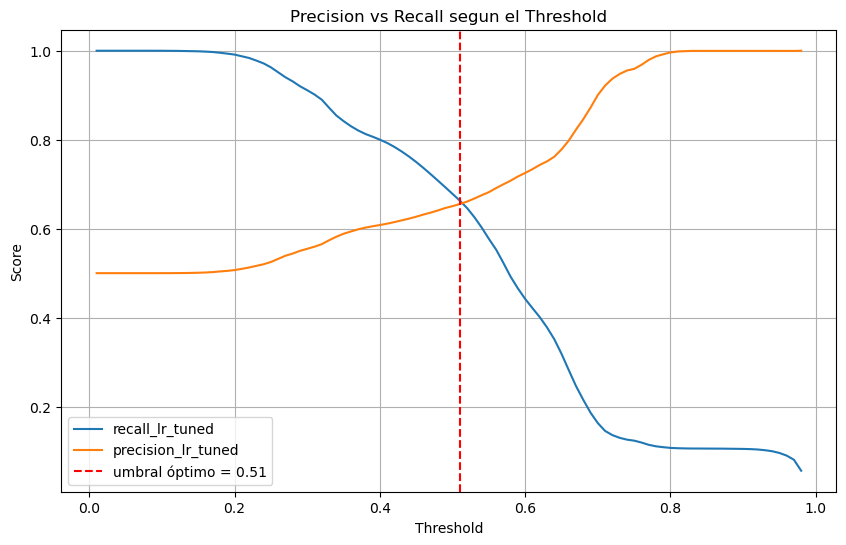

In [ ]:
# Hacer predicciones en el conjunto de prueba
prob_train_lr_tuned = best_lr.predict_proba(X_train_scaled)[:, 1]

# Buscar umbral óptimo
resultados_umbral_lr_tuned = []
for threshold in np.arange(0.01,0.99,0.01):
    preds_lr_tuned = [1 if p > threshold else 0 for p in prob_train_lr_tuned]
    recall_lr_tuned = recall_score(y_train, preds_lr_tuned)
    precision_lr_tuned = precision_score(y_train, preds_lr_tuned)
    resultados_umbral_lr_tuned.append([threshold,recall_lr_tuned,precision_lr_tuned])

# Convertir a DataFrame
df_umbral_lr_tuned = pd.DataFrame(resultados_umbral_lr_tuned,columns=['threshold','recall_lr_tuned','precision_lr_tuned'])

# Umbral donde recall y precision se cruzan
idx = np.argmin(abs(df_umbral_lr_tuned['recall_lr_tuned']-df_umbral_lr_tuned['precision_lr_tuned']))
chosen_threshold = df_umbral_lr_tuned.loc[idx, 'threshold']
print(f"Umbral óptimo: {chosen_threshold:.2f}")

# Visualizar precisión y recall según el umbral
plt.figure(figsize=(10,6))
plt.plot(df_umbral_lr_tuned['threshold'], df_umbral_lr_tuned['recall_lr_tuned'], label='recall_lr_tuned')
plt.plot(df_umbral_lr_tuned['threshold'], df_umbral_lr_tuned['precision_lr_tuned'], label='precision_lr_tuned')
plt.axvline(x=chosen_threshold,color='red',linestyle='--',label=f'umbral óptimo = {chosen_threshold:.2f}')
plt.title('Precision vs Recall segun el Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show

##### **Evaluar en TRAIN**

TRAIN
Recall: 0.6636
Precision: 0.6559
AUC: 0.6572


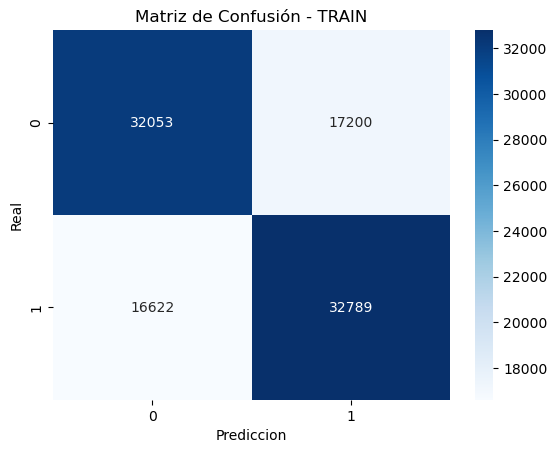

<function matplotlib.pyplot.show(close=None, block=None)>

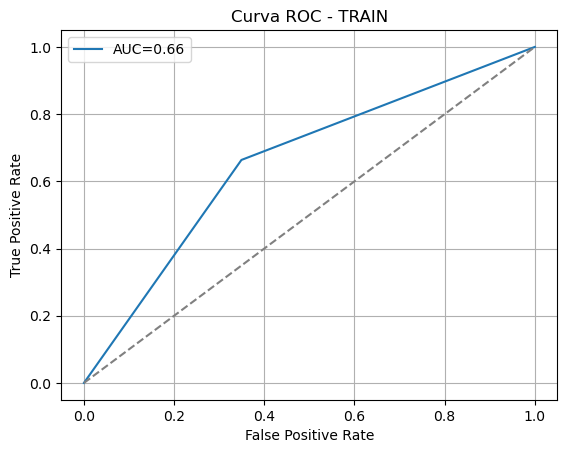

In [ ]:
preds_train_lr_tuned = [1 if p > chosen_threshold else 0 for p in prob_train_lr_tuned]
recall_train_lr_tuned = recall_score(y_train, preds_train_lr_tuned)
precision_train_lr_tuned = precision_score(y_train, preds_train_lr_tuned)
auc_train_lr_tuned = roc_auc_score(y_train,preds_train_lr_tuned)

print('TRAIN')
print(f'Recall: {recall_train_lr_tuned:.4f}')
print(f'Precision: {precision_train_lr_tuned:.4f}')
print(f'AUC: {auc_train_lr_tuned:.4f}')

# Matriz de confusión
cm_train_lr_tuned = confusion_matrix(y_train, preds_train_lr_tuned)
sns.heatmap(cm_train_lr_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TRAIN')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_train_tuned, tpr_train_tuned, _ = roc_curve(y_train, preds_train_lr_tuned)

plt.figure()
plt.plot(fpr_train_tuned, tpr_train_tuned, label = f'AUC={auc_train_lr_tuned:.2f}')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.title('Curva ROC - TRAIN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show

##### **Evaluar en TEST**

TRAIN
Recall: 0.6626
Precision: 0.6556
AUC: 0.6595


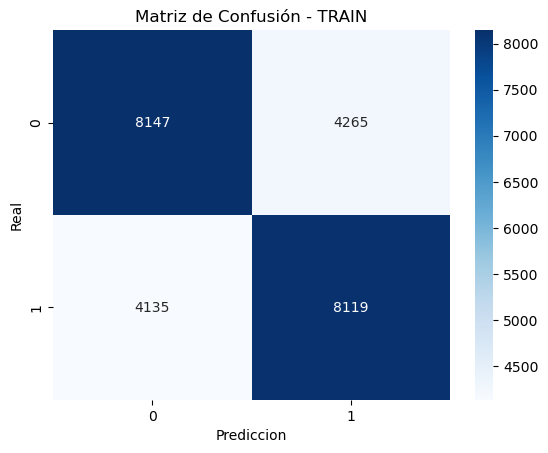

<function matplotlib.pyplot.show(close=None, block=None)>

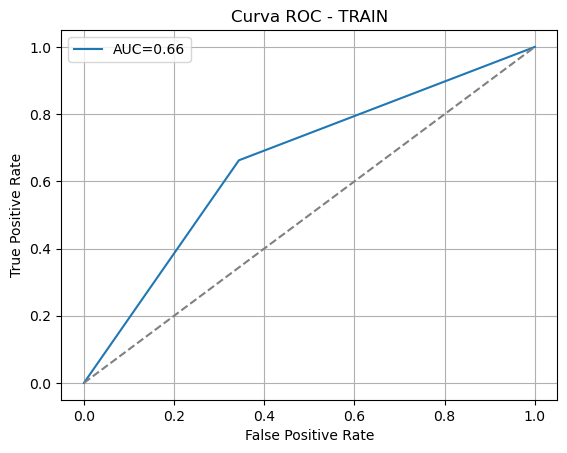

In [ ]:
prob_test_lr_tuned = best_lr.predict_proba(X_test_scaled)[:,1]
preds_test_lr_tuned = [1 if p > chosen_threshold else 0 for p in prob_test_lr_tuned]
recall_test_lr_tuned = recall_score(y_test, preds_test_lr_tuned)
precision_test_lr_tuned = precision_score(y_test, preds_test_lr_tuned)
auc_test_lr_tuned = roc_auc_score(y_test,preds_test_lr_tuned)

print('TRAIN')
print(f'Recall: {recall_test_lr_tuned:.4f}')
print(f'Precision: {precision_test_lr_tuned:.4f}')
print(f'AUC: {auc_test_lr_tuned:.4f}')

# Matriz de confusión
cm_test_lr_tuned = confusion_matrix(y_test, preds_test_lr_tuned)
sns.heatmap(cm_test_lr_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TRAIN')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_test_tuned, tpr_test_tuned, _ = roc_curve(y_test, preds_test_lr_tuned)

plt.figure()
plt.plot(fpr_test_tuned, tpr_test_tuned, label = f'AUC={auc_test_lm:.2f}')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.title('Curva ROC - TRAIN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show

##### **Resultados**

In [ ]:
resultados_lr_tuned = {'Modelo': 'Regresion Logistica - TUNED',
                 'Recall_Train': recall_train_lr_tuned,
                 'Precision_Train': precision_train_lr_tuned,
                 'AUC_Train': auc_train_lr_tuned,
                 'Recall_Test': recall_test_lr_tuned,
                 'Precision_Test': precision_test_lr_tuned,
                 'AUC_Test': auc_test_lr_tuned
                 }
final_results.append(resultados_lr_tuned)

#### **📕 Modelo Random Forest**

##### **GridSearch**

In [ ]:
# ParamGrid para Random Forest
param_rf = {
    'n_estimators': [200, 250, 300],
    'max_depth': [20, 25, 30],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'criterion': ['gini']
}

# Ajustar el modelo
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Guardar el mejor modelo
best_rf = grid_rf.best_estimator_
print('Mejores hiperparámetros:', grid_rf.best_params_)

Mejores hiperparámetros: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 250}


##### **Ajuste de umbral en TRAIN**

Umbral óptimo: 0.53


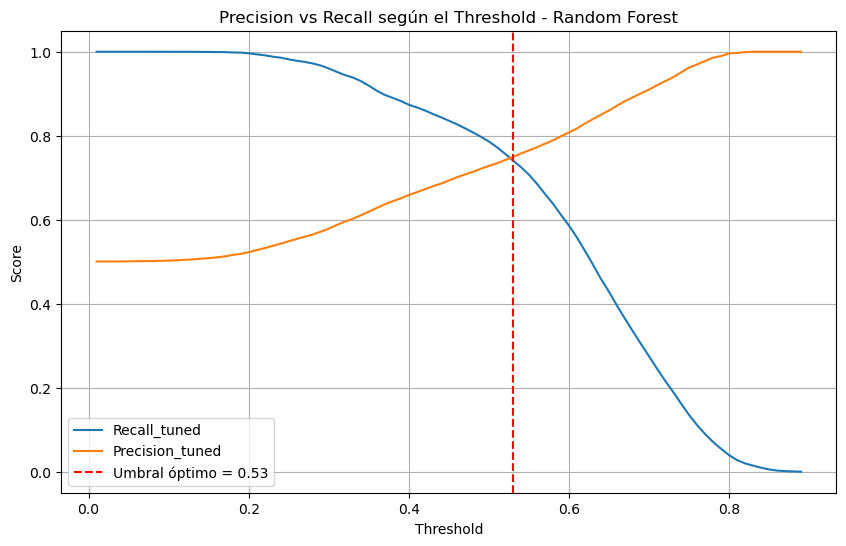

In [ ]:
# Hacer predicciones probabilísticas en el conjunto de entrenamiento
prob_train_rf_tuned = best_rf.predict_proba(X_train_scaled)[:, 1]

# Buscar umbral óptimo
resultados_umbral_rf_tuned = []
for threshold in np.arange(0.01, 0.90, 0.01):
    preds_rf_tuned = [1 if p > threshold else 0 for p in prob_train_rf_tuned]
    recall_rf_tuned = recall_score(y_train, preds_rf_tuned)
    precision_rf_tuned = precision_score(y_train, preds_rf_tuned)
    resultados_umbral_rf_tuned.append([threshold, recall_rf_tuned, precision_rf_tuned])

# Convertir a DataFrame
df_umbral_rf_tuned = pd.DataFrame(resultados_umbral_rf_tuned, columns=['threshold', 'recall_rf_tuned', 'precision_rf_tuned'])

# Umbral donde recall y precision se cruzan
idx = np.argmin(abs(df_umbral_rf_tuned['recall_rf_tuned'] - df_umbral_rf_tuned['precision_rf_tuned']))
chosen_threshold = df_umbral_rf_tuned.loc[idx, 'threshold']
print(f"Umbral óptimo: {chosen_threshold:.2f}")

# Visualizar precisión y recall según el umbral
plt.figure(figsize=(10, 6))
plt.plot(df_umbral_rf_tuned['threshold'], df_umbral_rf_tuned['recall_rf_tuned'], label='Recall_tuned')
plt.plot(df_umbral_rf_tuned['threshold'], df_umbral_rf_tuned['precision_rf_tuned'], label='Precision_tuned')
plt.axvline(x=chosen_threshold, color='red', linestyle='--', label=f'Umbral óptimo = {chosen_threshold:.2f}')
plt.title('Precision vs Recall según el Threshold - Random Forest')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

##### **Evaluar en TRAIN**

TRAIN
Recall_tuned: 0.7412
Precision_tuned: 0.7495
AUC_tuned: 0.7463


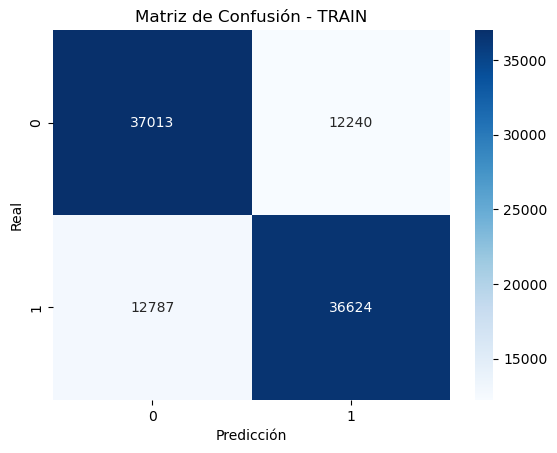

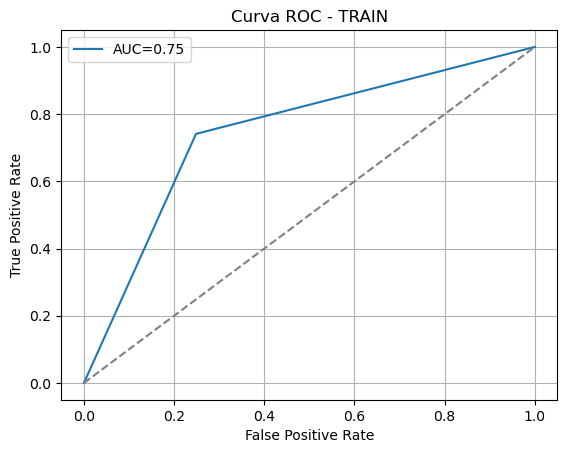

In [ ]:
# Hacer predicciones en el conjunto de entrenamiento con el umbral óptimo
preds_train_rf_tuned = [1 if p > chosen_threshold else 0 for p in prob_train_rf_tuned]
recall_train_rf_tuned = recall_score(y_train, preds_train_rf_tuned)
precision_train_rf_tuned = precision_score(y_train, preds_train_rf_tuned)
auc_train_rf_tuned = roc_auc_score(y_train, preds_train_rf_tuned)

print('TRAIN')
print(f'Recall_tuned: {recall_train_rf_tuned:.4f}')
print(f'Precision_tuned: {precision_train_rf_tuned:.4f}')
print(f'AUC_tuned: {auc_train_rf_tuned:.4f}')

# Matriz de confusión
cm_train_rf_tuned = confusion_matrix(y_train, preds_train_rf_tuned)
sns.heatmap(cm_train_rf_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TRAIN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_train_tuned, tpr_train_tuned, _ = roc_curve(y_train, preds_train_rf_tuned)

plt.figure()
plt.plot(fpr_train_tuned, tpr_train_tuned, label=f'AUC={auc_train_rf_tuned:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - TRAIN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

##### **Evaluar en TEST**

TEST
Recall_tuned: 0.6436
Precision_tuned: 0.6568
AUC_tuned: 0.6558


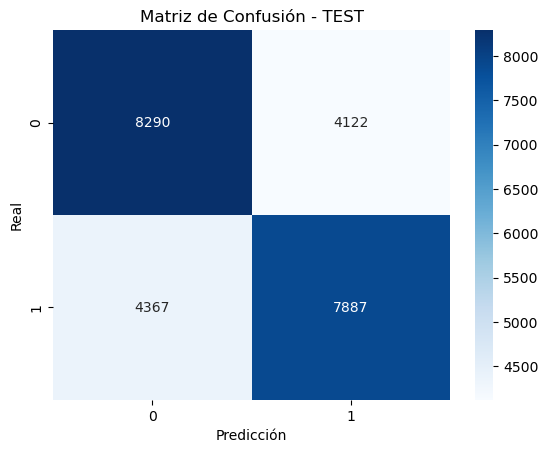

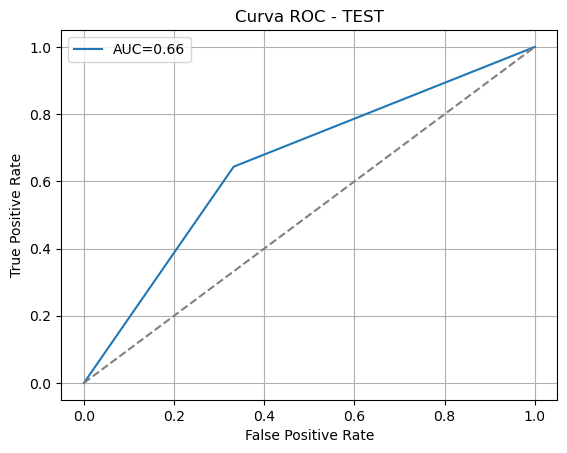

In [ ]:
# Hacer predicciones probabilísticas en el conjunto de prueba
prob_test_rf_tuned = best_rf.predict_proba(X_test_scaled)[:, 1]
preds_test_rf_tuned = [1 if p > chosen_threshold else 0 for p in prob_test_rf_tuned]

# Calcular métricas en el conjunto de prueba
recall_test_rf_tuned = recall_score(y_test, preds_test_rf_tuned)
precision_test_rf_tuned = precision_score(y_test, preds_test_rf_tuned)
auc_test_rf_tuned = roc_auc_score(y_test, preds_test_rf_tuned)

print('TEST')
print(f'Recall_tuned: {recall_test_rf_tuned:.4f}')
print(f'Precision_tuned: {precision_test_rf_tuned:.4f}')
print(f'AUC_tuned: {auc_test_rf_tuned:.4f}')

# Matriz de confusión
cm_test_rf_tuned = confusion_matrix(y_test, preds_test_rf_tuned)
sns.heatmap(cm_test_rf_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TEST')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_test_tuned, tpr_test_tuned, _ = roc_curve(y_test, preds_test_rf_tuned)

plt.figure()
plt.plot(fpr_test_tuned, tpr_test_tuned, label=f'AUC={auc_test_rf_tuned:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - TEST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

##### **Resultados**

In [ ]:
resultados_rf_tuned = {
    'Modelo': 'Random Forest - TUNED',
    'Recall_Train': recall_train_rf_tuned,
    'Precision_Train': precision_train_rf_tuned,
    'AUC_Train': auc_train_rf_tuned,
    'Recall_Test': recall_test_rf_tuned,
    'Precision_Test': precision_test_rf_tuned,
    'AUC_Test': auc_test_rf_tuned
}
final_results.append(resultados_rf_tuned)

#### **📘 Modelo Gradient Boosting**

##### **GridSearch**

In [ ]:
# ParamGrid para Gradient Boosting
param_gb = {
    'n_estimators': [100,300],
    'learning_rate': [0.01,0.1],
    'max_depth': [3,7],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'subsample': [0.6,1.0]
}

# Ajuste con GridSearchCV
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_gb, cv=3, scoring='roc_auc', n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train)

# Mejor modelo
best_gb = grid_gb.best_estimator_
print('Mejores hiperparámetros GB:', grid_gb.best_params_)

Mejores hiperparámetros GB: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


##### **Ajuste de umbral en TRAIN**

Umbral óptimo: 0.52


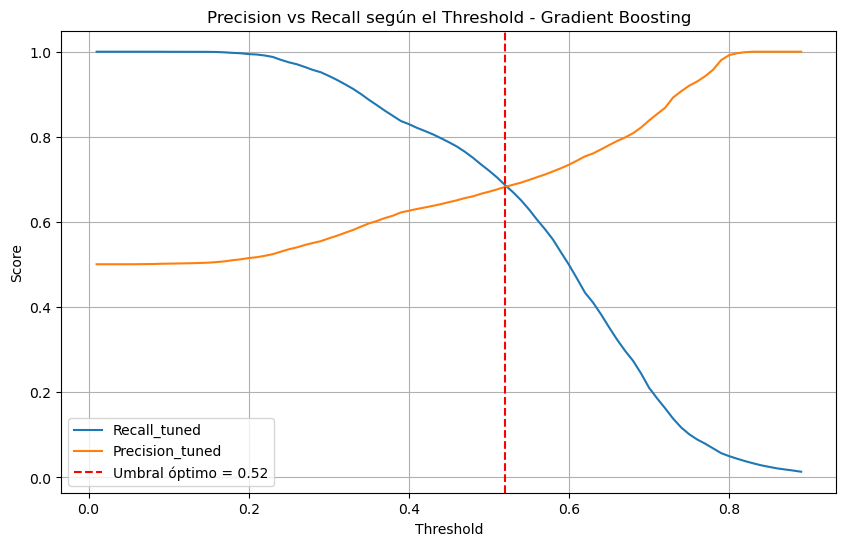

In [ ]:
# Hacer predicciones probabilísticas en el conjunto de entrenamiento
prob_train_gb_tuned = best_gb.predict_proba(X_train_scaled)[:, 1]

# Buscar umbral óptimo
resultados_umbral_gb_tuned = []
for threshold in np.arange(0.01, 0.90, 0.01):
    preds_gb_tuned = [1 if p > threshold else 0 for p in prob_train_gb_tuned]
    recall_gb_tuned = recall_score(y_train, preds_gb_tuned)
    precision_gb_tuned = precision_score(y_train, preds_gb_tuned)
    resultados_umbral_gb_tuned.append([threshold, recall_gb_tuned, precision_gb_tuned])

# Convertir a DataFrame
df_umbral_gb_tuned = pd.DataFrame(resultados_umbral_gb_tuned, columns=['threshold', 'recall_gb_tuned', 'precision_gb_tuned'])

# Umbral donde recall y precision se cruzan
idx = np.argmin(abs(df_umbral_gb_tuned['recall_gb_tuned'] - df_umbral_gb_tuned['precision_gb_tuned']))
chosen_threshold = df_umbral_gb_tuned.loc[idx, 'threshold']
print(f"Umbral óptimo: {chosen_threshold:.2f}")

# Visualizar precisión y recall según el umbral
plt.figure(figsize=(10, 6))
plt.plot(df_umbral_gb_tuned['threshold'], df_umbral_gb_tuned['recall_gb_tuned'], label='Recall_tuned')
plt.plot(df_umbral_gb_tuned['threshold'], df_umbral_gb_tuned['precision_gb_tuned'], label='Precision_tuned')
plt.axvline(x=chosen_threshold, color='red', linestyle='--', label=f'Umbral óptimo = {chosen_threshold:.2f}')
plt.title('Precision vs Recall según el Threshold - Gradient Boosting')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

##### **Evaluar en TRAIN**

TRAIN
Recall_tuned: 0.6870
Precision_tuned: 0.6825
AUC_tuned: 0.6832


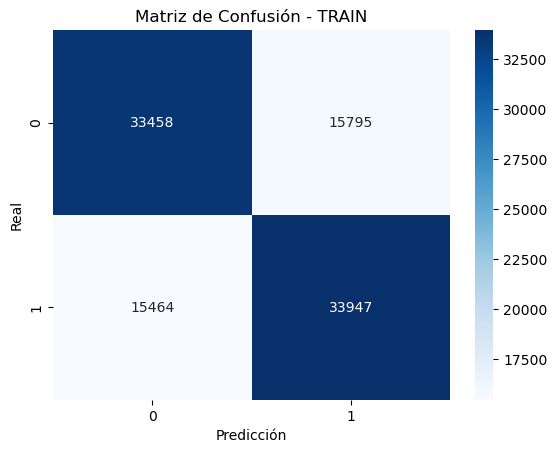

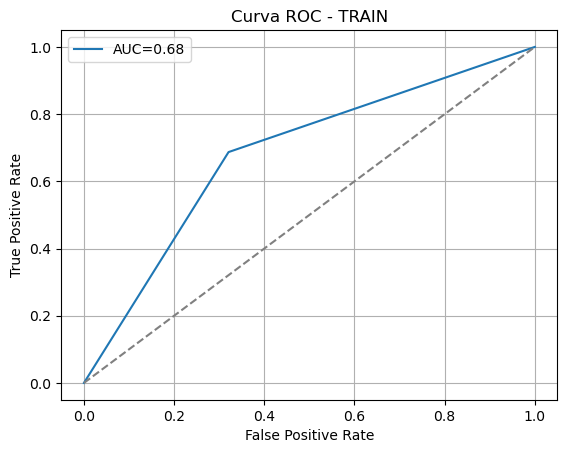

In [ ]:
# Hacer predicciones en el conjunto de entrenamiento con el umbral óptimo
preds_train_gb_tuned = [1 if p > chosen_threshold else 0 for p in prob_train_gb_tuned]
recall_train_gb_tuned = recall_score(y_train, preds_train_gb_tuned)
precision_train_gb_tuned = precision_score(y_train, preds_train_gb_tuned)
auc_train_gb_tuned = roc_auc_score(y_train, preds_train_gb_tuned)

print('TRAIN')
print(f'Recall_tuned: {recall_train_gb_tuned:.4f}')
print(f'Precision_tuned: {precision_train_gb_tuned:.4f}')
print(f'AUC_tuned: {auc_train_gb_tuned:.4f}')

# Matriz de confusión
cm_train_gb_tuned = confusion_matrix(y_train, preds_train_gb_tuned)
sns.heatmap(cm_train_gb_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TRAIN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_train_tuned, tpr_train_tuned, _ = roc_curve(y_train, preds_train_gb_tuned)

plt.figure()
plt.plot(fpr_train_tuned, tpr_train_tuned, label=f'AUC={auc_train_gb_tuned:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - TRAIN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

##### **Evaluar en TEST**

TEST
Recall_tuned: 0.6586
Precision_tuned: 0.6550
AUC_tuned: 0.6581


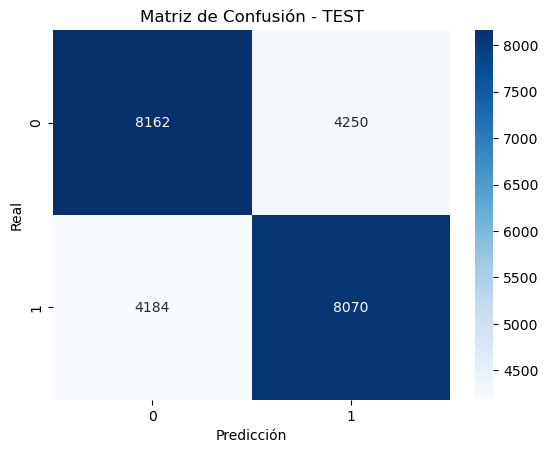

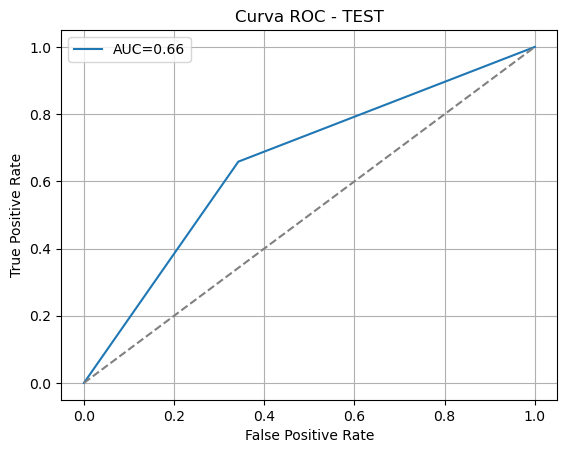

In [ ]:
# Hacer predicciones probabilísticas en el conjunto de prueba
prob_test_gb_tuned = best_gb.predict_proba(X_test_scaled)[:, 1]
preds_test_gb_tuned = [1 if p > chosen_threshold else 0 for p in prob_test_gb_tuned]

# Calcular métricas en el conjunto de prueba
recall_test_gb_tuned = recall_score(y_test, preds_test_gb_tuned)
precision_test_gb_tuned = precision_score(y_test, preds_test_gb_tuned)
auc_test_gb_tuned = roc_auc_score(y_test, preds_test_gb_tuned)

print('TEST')
print(f'Recall_tuned: {recall_test_gb_tuned:.4f}')
print(f'Precision_tuned: {precision_test_gb_tuned:.4f}')
print(f'AUC_tuned: {auc_test_gb_tuned:.4f}')

# Matriz de confusión
cm_test_gb_tuned = confusion_matrix(y_test, preds_test_gb_tuned)
sns.heatmap(cm_test_gb_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TEST')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_test_tuned, tpr_test_tuned, _ = roc_curve(y_test, preds_test_gb_tuned)

plt.figure()
plt.plot(fpr_test_tuned, tpr_test_tuned, label=f'AUC={auc_test_gb_tuned:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - TEST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

##### **Resultados**

In [ ]:
resultados_gb_tuned = {
    'Modelo': 'Gradient Boosting - TUNED',
    'Recall_Train': recall_train_gb_tuned,
    'Precision_Train': precision_train_gb_tuned,
    'AUC_Train': auc_train_gb_tuned,
    'Recall_Test': recall_test_gb_tuned,
    'Precision_Test': precision_test_gb_tuned,
    'AUC_Test': auc_test_gb_tuned
}

final_results.append(resultados_gb_tuned)

#### **💡Resultados tras el ajuste:**

In [ ]:
results_df = pd.DataFrame(final_results)
results_df

,Modelo,Recall_Train,Precision_Train,AUC_Train,Recall_Test,Precision_Test,AUC_Test
0,Regresion Logistica,0.661108,0.656577,0.657103,0.660274,0.656524,0.659617
1,Random Forest,0.839955,0.843763,0.841962,0.641097,0.635753,0.639232
2,Gradient Boosting,0.659570,0.647141,0.649390,0.655133,0.643372,0.648305
3,Regresion Logistica - TUNED,0.663597,0.655924,0.657190,0.662559,0.655604,0.659470
4,Random Forest - TUNED,0.741211,0.749509,0.746349,0.643627,0.656757,0.655764
5,Gradient Boosting - TUNED,0.687033,0.682462,0.683171,0.658560,0.655032,0.658075


In [ ]:
# Transformar el DataFrame de formato ancho a formato largo
results_long_df = results_df.melt(id_vars='Modelo', var_name='Metric', value_name='Score')
results_long_df.head()

,Modelo,Metric,Score
0,Regresion Logistica,Recall_Train,0.661108
1,Random Forest,Recall_Train,0.839955
2,Gradient Boosting,Recall_Train,0.659570
3,Regresion Logistica - TUNED,Recall_Train,0.663597
4,Random Forest - TUNED,Recall_Train,0.741211


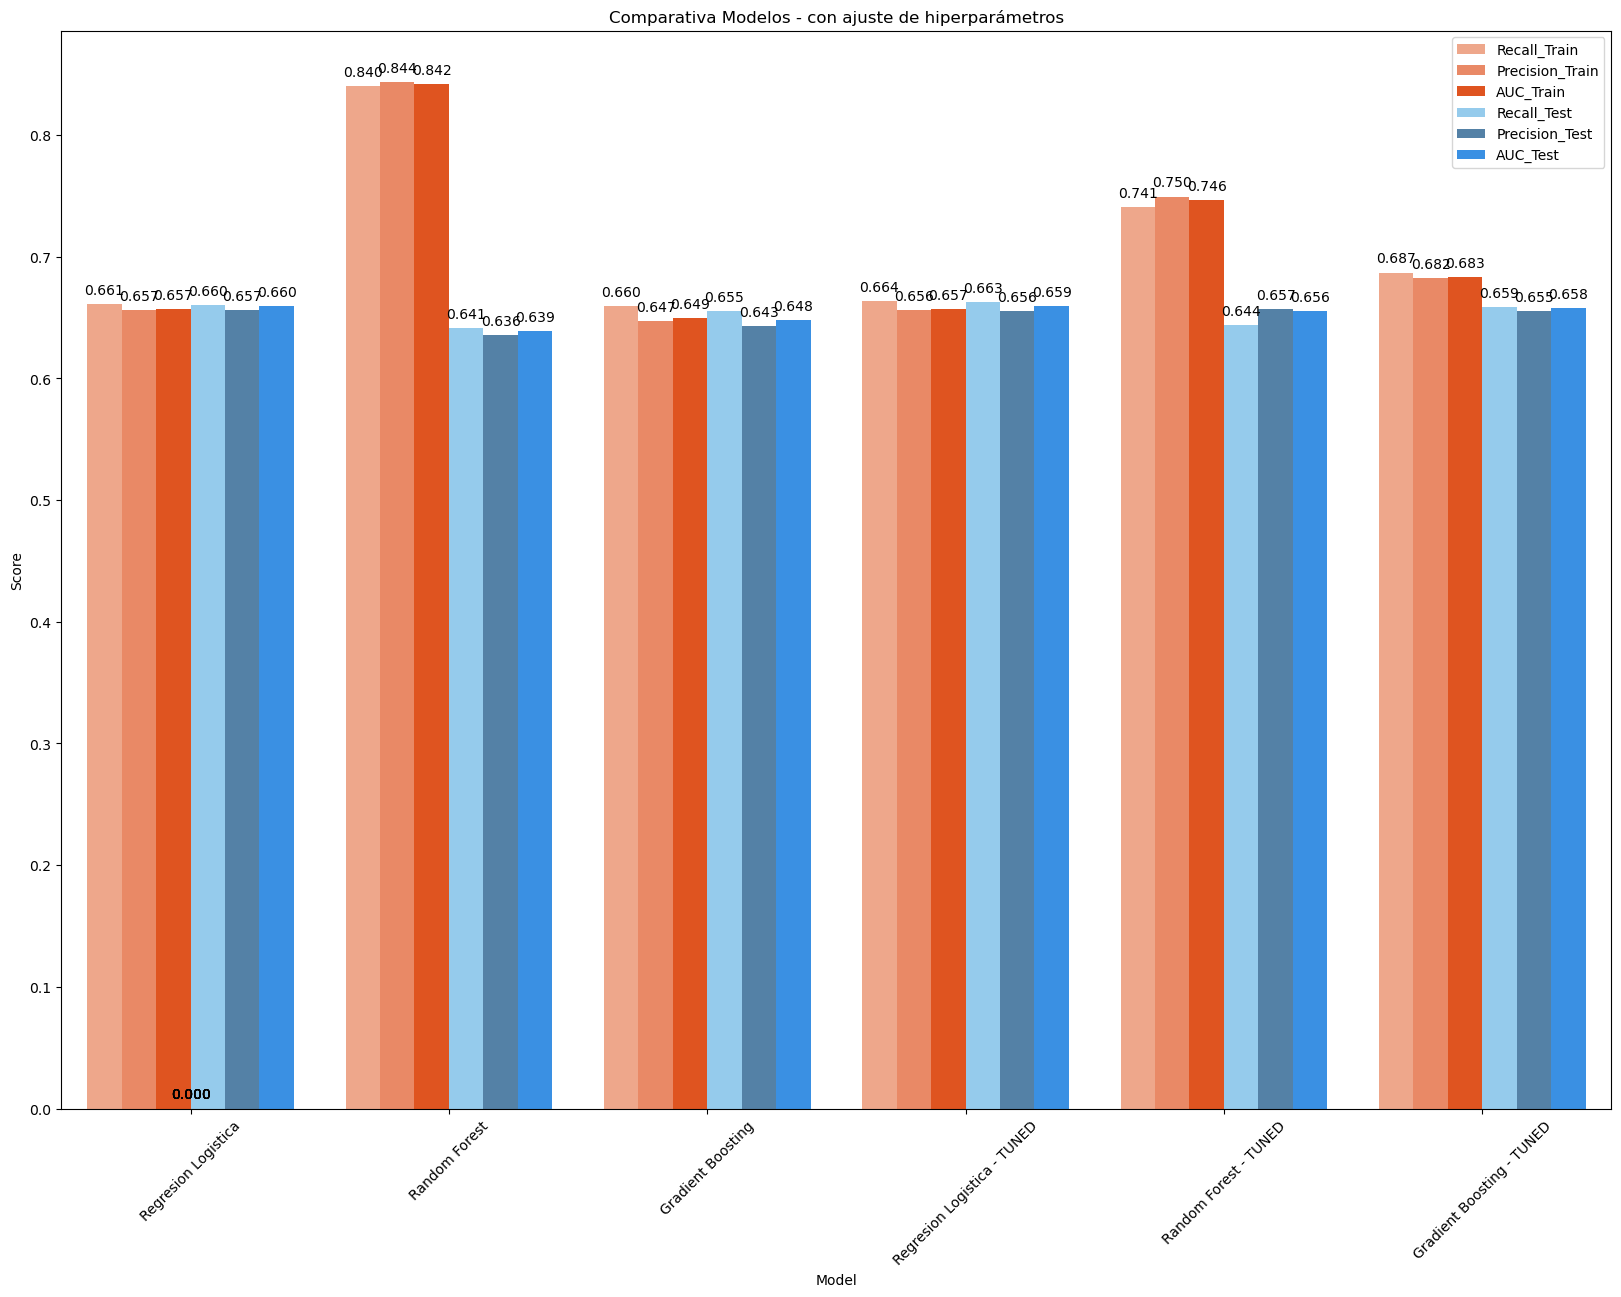

In [ ]:
# Definir una paleta de colores personalizada
palette = {
    'Recall_Train': '#FFA07A',  # Light Salmon
    'Precision_Train': '#FF7F50',  # Coral
    'AUC_Train': '#FF4500',  # Orange Red
    'Recall_Test': '#87CEFA',  # Light Sky Blue
    'Precision_Test': '#4682B4',  # Steel Blue
    'AUC_Test': '#1E90FF'  # Dodger Blue
}

# Crear el gráfico de barras usando seaborn
plt.figure(figsize=(20, 14))
ax = sns.barplot(x='Modelo', y='Score', hue='Metric', data=results_long_df, palette=palette)
plt.title('Comparativa Modelos - con ajuste de hiperparámetros')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Añadir los valores de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

### 📅 **Pipeline completo del modelo:**

In [ ]:
datos_copia

,producto_comercial,dgt_agrupado,forma_contratacion,tipo_productor,forma_pago,canal_cliente,sectores_contratados,integralidad_cliente,cliente_activo_digital,sectores_estrategicos,tipo_valor_cliente,mes_proceso,tramo_edad,tramo_antiguedad,tramo_numero_polizas,canal_contratacion_agrupado,resultado_retencion
0,AI,CATALUÑA-BALEARES,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,8,31-80,1-30,2,RED,RETENIDO
1,AI,NOROESTE,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,9,31-80,1-30,2,RED,ANULADO
2,AI,NOROESTE,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,6,31-80,31-48,3,RED,RETENIDO
3,AN,SUROESTE,INTERMEDIADO,AGENTES,A,1,AP,C,S,2.0,3,11,31-80,1-30,3,RED,RETENIDO
4,AI,MADRID,INTERMEDIADO,DELEGADOS,A,1,A,D,S,1.0,3,10,31-80,1-30,1,RED,ANULADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107953,AN,ESTE,INTERMEDIADO,DELEGADOS,A,1,A,D,S,1.0,3,5,31-80,<1,1,RED,RETENIDO
107954,AN,NORTE,INTERMEDIADO,INTERNET,S,1,A,D,S,1.0,3,5,31-80,<1,1,OTROS CANALES,RETENIDO
107955,AQ,SUROESTE,INTERMEDIADO,DELEGADOS,A,1,A,D,S,1.0,3,5,31-80,<1,3,RED,ANULADO
107956,AN,MADRID,INTERMEDIADO,DELEGADOS,A,1,A,D,S,1.0,3,5,31-80,1-30,1,RED,ANULADO


In [ ]:
datos_copia['sectores_contratados_codificado']=datos_copia['sectores_contratados'].apply(lambda x:len(x))

In [ ]:
X = datos_copia.drop('resultado_retencion', axis=1)
y = datos_copia['resultado_retencion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# Columnas por tipo
onehot_cols = ['producto_comercial', 'dgt_agrupado', 'forma_contratacion', 'tipo_productor',
'forma_pago', 'cliente_activo_digital', 'tramo_edad', 'tramo_antiguedad', 'canal_contratacion_agrupado']

ordinal_cols = ['integralidad_cliente']
ordinal_vals = [['D', 'C', 'B', 'A']] # orden lógico para cada columna ordinal

# Numéricas (estas se quedan como están)
numeric_cols = ['canal_cliente', 'sectores_estrategicos', 'tipo_valor_cliente', 'mes_proceso', 'tramo_numero_polizas', 'sectores_contratados_codificado']


In [ ]:
# Preprocesadores
preprocesamiento = ColumnTransformer(transformers=[
('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_cols),
('ordinal', OrdinalEncoder(categories=ordinal_vals), ordinal_cols),
('num', StandardScaler(), numeric_cols)
])

In [ ]:
# Modelo con pipeline
modelo_final = Pipeline(steps=[
('preprocesador', preprocesamiento),
('clasificador', LogisticRegression())
])

In [ ]:
# Entrenamiento
modelo_final.fit(X_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['producto_comercial',
                                                   'dgt_agrupado',
                                                   'forma_contratacion',
                                                   'tipo_productor',
                                                   'forma_pago',
                                                   'cliente_activo_digital',
                                                   'tramo_edad',
                                                   'tramo_antiguedad',
                                                   'canal_contratacion_agrupado']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['D',
                                                                              'C',
                                                                              'B',
                                                                              'A']]),
                                                  ['integralidad_cliente']),
                                                 ('num', StandardScaler(),
                                                  ['canal_cliente',
                                                   'sectores_estrategicos',
                                                   'tipo_valor_cliente',
                                                   'mes_proceso',
                                                   'tramo_numero_polizas',
                                                   'sectores_contratados_codificado'])])),
                ('clasificador', LogisticRegression())])

In [ ]:
# Guardado del pipeline
joblib.dump(modelo_final, 'modelo_retencion_pipeline.pkl')

['modelo_retencion_pipeline.pkl']